### Uppgift 0 - uppvärmning med riket
- Import and read excel file 
- 0.a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.

In [9]:
import pandas as pd


file_path_riket = ("../Labb2/riket2023_åk9_np.xlsx")

# Read the different sheets from the Excel file, skipping the first 8 rows, and store it in a DataFrame.
df_riket_engelska = pd.read_excel(file_path_riket, sheet_name='Engelska', skiprows=8)
df_riket_matematik = pd.read_excel(file_path_riket, sheet_name='Matematik', skiprows=8)
df_riket_svenska = pd.read_excel(file_path_riket, sheet_name='Svenska', skiprows=8)
df_riket_andra_språk = pd.read_excel(file_path_riket, sheet_name='Svenska som andraspråk', skiprows=8)



## Name change columns

- 0.a) 

In [10]:
# Changing names on columns
df_riket_engelska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_matematik.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_svenska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_andra_språk.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']

df_riket_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### F in mathematics 

- 0.b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.



In [11]:
# Copy the dataFrame to a new dataFrame for F grade calculations
df_f_math = df_riket_matematik.copy()

# Clean the column names by removing spaces
df_f_math.columns = [col.strip() for col in df_f_math.columns]

# replace '~100' with '100' 
df_f_math.replace('~100', 100, inplace=True)

# Make selected columns numeric, turn errors into NaN
columns_to_convert = ['Flickor (A-F)', 'Pojkar (A-F)', 'Flickor (A-E)', 'Pojkar (A-E)']
for column in columns_to_convert:
    df_f_math[column] = pd.to_numeric(df_f_math[column], errors='coerce')

# Calculate the number of girls with F grades by subtracting the estimated number of girls with A-E from the total.
df_f_math['Flickor (F)'] = df_f_math['Flickor (A-F)'] - (df_f_math['Flickor (A-F)'] * (df_f_math['Flickor (A-E)'] / 100)).round()
df_f_math['Pojkar (F)'] = df_f_math['Pojkar (A-F)'] - (df_f_math['Pojkar (A-F)'] * (df_f_math['Pojkar (A-E)'] / 100)).round()
# Sum the F grades for girls and boys to get the total number of students with F grades.
df_f_math['Totalt (F)'] = df_f_math['Flickor (F)'] + df_f_math['Pojkar (F)']

df_f_math

C:\Users\utjis\AppData\Local\Temp\ipykernel_19964\3816872280.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng),Flickor (F),Pojkar (F),Totalt (F)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0,5825.0,5798.0,11623.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7,4967.0,5034.0,10001.0
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1,869.0,742.0,1611.0
3,Riket,Skolverket,50,25,25,100.0,100.0,100.0,14.1,13.5,14.7,0.0,0.0,0.0


## Barplot total points

- 0.c Rita ett stapeldiagram på totala poängen för de olika ämnena.
 


In [12]:
import matplotlib.pyplot as plt

## Data cleaning and preparing data for plotting

# Converts the total points from different subjects into lists for plotting
math_total = df_riket_matematik['Totalt (Poäng)'].tolist()  
english_total = df_riket_engelska['Totalt (Poäng)'].tolist()  
swedish_total = df_riket_svenska['Totalt (Poäng)'].tolist()  
other_lang_total = df_riket_andra_språk['Totalt (Poäng)'].tolist()

# Create a new DataFrame combining all subjects
combined_df = pd.DataFrame({'Matte':math_total, 'Engelska': english_total, 'Svenska': swedish_total, 'Svenska som andraspråk': other_lang_total})

# Make a clean copy of the combined DataFrame
combined_cleaned = pd.DataFrame(combined_df)

# Converts 'svenska som andraspråk' to numeric, changing errors to NaN
combined_cleaned['Svenska som andraspråk'] = pd.to_numeric(combined_cleaned['Svenska som andraspråk'], errors='coerce')




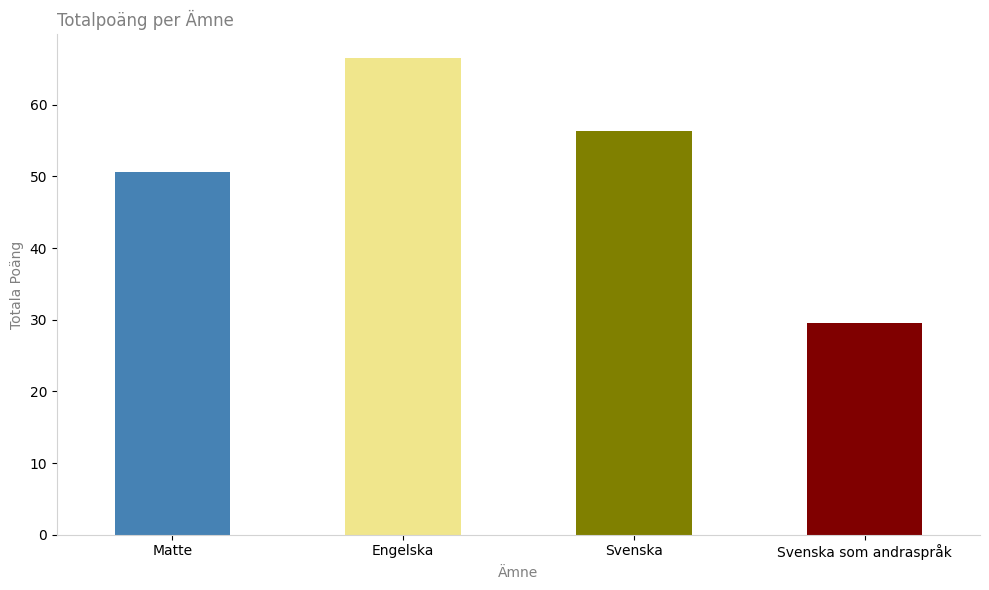

In [13]:
total_scores_per_subject = combined_cleaned.sum() # calc the sum of the scores of each subject

colors = ['steelblue', 'khaki', 'olive', 'maroon'] # color palette for the bar plot

ax_new = total_scores_per_subject.plot(kind='bar', figsize=(10, 6), color=colors) # create a barplot and define the size and colors

# sets title and labels for x and y axis
plt.title('Totalpoäng per Ämne', loc='left', color= 'grey')
plt.xlabel('Ämne', color= 'grey')
plt.ylabel('Totala Poäng', color= 'grey')

plt.xticks(rotation=0) # rotate the x-axis for better readability

# hides right and top spine for a cleaner look, sets lighter colours on the rest
ax_new.spines['top'].set_visible(False)
ax_new.spines['right'].set_visible(False)
ax_new.spines['bottom'].set_color('lightgray')
ax_new.spines['left'].set_color('lightgray')

plt.tight_layout()
plt.show()

## Total points subplots
- 0.d Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen

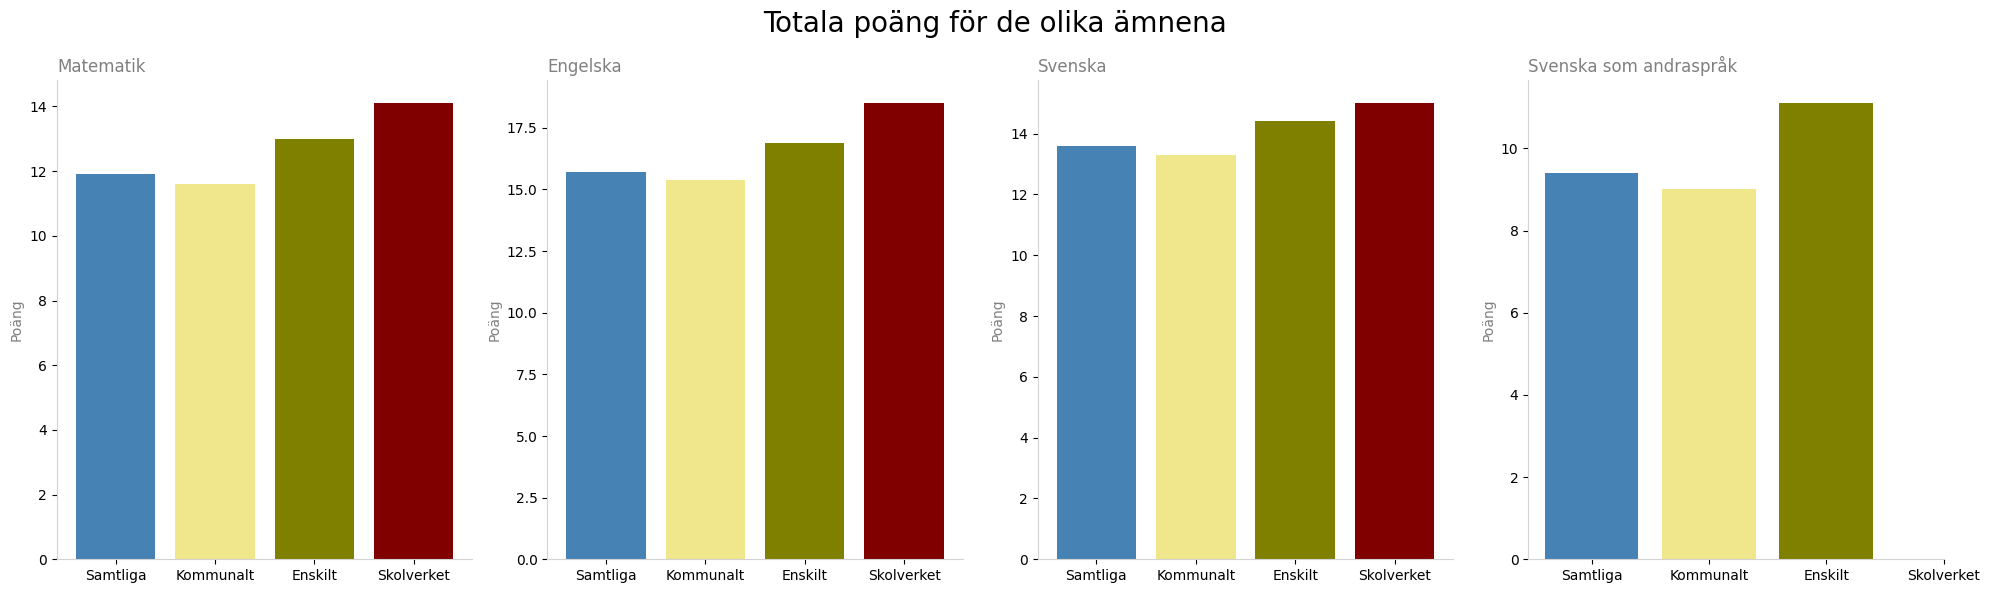

In [14]:
import numpy as np

# Convert other language total scores to float, setting ".." as NaN
cleaned_other_lang_total = [np.nan if x == '..' else float(x) for x in other_lang_total]

subjects = [('Matematik', math_total), ('Engelska', english_total), ('Svenska', swedish_total), ('Svenska som andraspråk', cleaned_other_lang_total)] # define the subjects
labels = ['Samtliga', 'Kommunalt', 'Enskilt', 'Skolverket']  # labels for x-axis
tick_positions = range(len(labels))  # positions for each x-axis label

fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Creates 4 subplots

# Loop through each subject and its totals to create individual bar charts
for ax, (title, totals) in zip(axes, subjects):
    ax.bar(tick_positions, totals, color=colors)  # Plot bars at predefined postitions.
    ax.set_title(title, loc="left", color= 'grey')
    ax.set_xticks(tick_positions)  # Set the positions for the x-ticks
    ax.set_xticklabels(labels, rotation=0) 
    ax.set_ylabel('Poäng', color='grey')
    # Hide the right and top spines for a cleaner look
    ax.spines.right.set_visible(False) 
    ax.spines.top.set_visible(False)
    # Set the color of the bottom and left spines
    ax.spines['bottom'].set_color('lightgray')
    ax.spines['left'].set_color('lightgray')
    
    fig.suptitle('Totala poäng för de olika ämnena', fontsize= 20) # adds a title for the entire figure 

# Adjust the layout to make sure everything fits without overlapping
plt.tight_layout()
plt.show()


## Uppgift 1 - uppvärmning betyg och prov


- a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [15]:
file_path_betyg = ("../Labb2/betyg_o_prov_riksnivå.xlsx")


df_betyg_T1a = pd.read_excel(file_path_betyg, sheet_name='Tabell 1A', skiprows=9)
df_betyg_T1b = pd.read_excel(file_path_betyg, sheet_name='Tabell 1B', skiprows=7)

df_betyg_T1a.columns = ['Läsår/huvudman/Bakgrund', 'Elever som avslutat åk 9 (Totalt)', 'Elever som avslutat åk 9 (Flickor)', 'Elever som avslutat åk 9 (Pojkar)', ' Med slutbetyg (Totalt)', 
                        'Med slutbetyg (Flickor)', 'Med slutbetyg (Pojkar)', 'Med godkända slutbetyg (Totalt)', 
                        'Med godkända slutbetyg (Flickor)', 'Med godkända slutbetyg (Pojkar)']
df_betyg_T1a.replace('.', np.nan, inplace=True)

df_betyg_T1b.columns = ['Läsår/huvudman/Bakgrund', 'Genomsnittligt meritvärde Tot (16 ämnen)', 'Genomsnittligt meritvärde F (16 ämnen)', 'Genomsnittligt meritvärde P (16 ämnen)', ' Genomsnittligt meritvärde Tot (17 ämnen)', 
                        'Genomsnittligt meritvärde F (17 ämnen)', 'Genomsnittligt meritvärde P (17 ämnen)', '(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt)', 
                        '(%) elever som saknar godkänt betyg i ett eller fler  ämnen (Flickor)', '(%) elever som saknar godkänt betyg i ett eller fler  ämnen (Pojkar)']

df_betyg_T1b.head()


C:\Users\utjis\AppData\Local\Temp\ipykernel_19964\1357057581.py:10: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Läsår/huvudman/Bakgrund,Genomsnittligt meritvärde Tot (16 ämnen),Genomsnittligt meritvärde F (16 ämnen),Genomsnittligt meritvärde P (16 ämnen),Genomsnittligt meritvärde Tot (17 ämnen),Genomsnittligt meritvärde F (17 ämnen),Genomsnittligt meritvärde P (17 ämnen),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Totalt),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Flickor),(%) elever som saknar godkänt betyg i ett eller fler ämnen (Pojkar)
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [44]:
import plotly.express as px

# Select relevant data: first 5 rows, columns for year and percentages
df_focused = df_betyg_T1b.iloc[:5, [0, 7, 8, 9]].copy()

# Rename columns for clarity in the plot
df_focused.columns = ['Läsår', 'Totalt (%)', 'Flickor (%)', 'Pojkar (%)']



# Create the linechart with Plotly with the new data
fig = px.line(df_focused, x='Läsår', y=['Totalt (%)', 'Flickor (%)', 'Pojkar (%)'], 
              title="Andel elever som saknar godkänt betyg i ett eller fler ämnen 2018-2023",
              labels={"value": "Andel (%)", "variable": "Grupp"},
              markers=True, # Add markers for each data point
              color_discrete_map={ # Assign custom colors
                  'Totalt (%)': 'orangered',  
                  'Flickor (%)': 'indigo',  
                  'Pojkar (%)': 'teal'  
              })
# Update the layout of the figure for a cleaner presentation

fig.update_layout(yaxis_tickformat = '.1f', # Formats the y-axis ticks to show numbers with one decimal 
                  xaxis_title="Läsår", 
                  yaxis_title="Andel (%) som saknar godkänt betyg", 
                  legend=dict(title="Grupper",orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1), # Customizes the legend's appearance and position
                  paper_bgcolor="white", plot_bgcolor="whitesmoke")
fig.write_html("../Labb2/Visualiseringar/Andel_elever_saknar_betyg.html")

fig.show()


## b.)